[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_03_arboles_de_decision_sklearn-published.ipynb)

## Scikit-learn (sklearn)

### Primera aplicación, clasificación de "iris"

El dataset Fisher's Iris es un conjunto de datos multivariado introducido por Ronald Fisher en su paper de 1936 *The use of multiple measurements in taxonomic problems* como un ejemplo de análisis discriminante lineal.


![Representación de las flores del data set](https://github.com/aprendizaje-automatico-dc-uba-ar/material/raw/main/notebooks/n03-iris.png)



El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros y además se tiene el nombre de la especie a la que pertence. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

Antes de empezar, cargamos todas las bibliotecas que vamos a usar. Como iris es un dataset muy común, forma parte de los datasets que provee `sklearn`.


Acá vemos como cargarlo:

NameError: name 'muestras' is not defined

In [65]:
# Cargamos algunas bibliotecas 
import numpy as np
import pandas as pdmuestrasla
import sklearn 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5] # para ver los gráficos más grandes

# Cargamos el dataset que usaremos hoy
from sklearn.datasets import load_iris
iris_dataset = load_iris()


### Antes de empezar: exploración del objeto ```iris_dataset```

1. ¿Qué tipo de objeto es `iris_dataset`? RESPUESTA: sklearn.utils._bunch.Bunch
1. Listar las claves que tiene. HECHO.
1. Listar los valores que puede tomar la variable `target` (las que vamos a querer aprender). HECHO.
1. Listar los atributos del dataset. HECHO.
1. ¿Qué hay en las primeras 5 filas? RESPUESTA: Medidas (decimales) , en cuatro columnas: sepal length sepal width, petal length, petal width 
1. ¿Qué dimensión tiene el dataset? RESPUESTA: 150 instancias x 4 atributos
1. ¿Cuál es el `target` en las últimas 5 filas? RESPUESTA todos tienen target 2

Además, hay una descripción del dataset incluida en el objeto que se puede acceder con: `iris_dataset.DESCR`.


In [3]:
print(type(iris_dataset)) # INFO imprimimos tipo del dataset

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
print(iris_dataset.keys()) # INFO imprimimos las claves de Bunch

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [10]:
print(iris_dataset["data"][0]) # INFO imprimimos las primera linea (4 celdas numericas)

[5.1 3.5 1.4 0.2]


In [25]:
print(iris_dataset["data"][0:5]) # INFO imprimimos las primera linea (4 celdas numericas)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [32]:
print("target:",iris_dataset["target"]) # 0: Setosa 1: Versicolor 2: Virginica
print("target(type):",type(iris_dataset["target"]))
print("target(unique):",np.unique(iris_dataset["target"])) 
print("frame:",iris_dataset["frame"])
print("target_names:",iris_dataset["target_names"]) 
print("feature_names:",iris_dataset["feature_names"]) 
print("DESCR:",iris_dataset["feature_names"])
print("dimensiones:",iris_dataset["data"].shape)
print("ultimos 5 targets:",iris_dataset["target"][-5:])

target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
target(type): <class 'numpy.ndarray'>
target(unique): [0 1 2]
frame: None
target_names: ['setosa' 'versicolor' 'virginica']
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
DESCR: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
dimensiones: (150, 4)
ultimos 5 targets: [2 2 2 2 2]


### Paso 1: División de datos (training - testing)

Ya veremos en las próximas clases de la materia, pero una forma de mitigar la percepción de cuán bien (o mal) anda nuestro modelo, es separar nuestros datos en 2:

  - una parte para mirar, entender y **entrenar**
  - otra parte que solo usaremos para medir la performance

(más detalles en breve)

<img src="https://github.com/aprendizaje-automatico-dc-uba-ar/material/raw/main/notebooks/n03-train-test-split.png"  width="600">
Fuente imagen: https://www.sharpsightlabs.com/blog/scikit-train_test_split/


Para esto usaremos la función `train_test_split` de `sklearn` [(ver Documentación)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) y generaremos:
  - `X_train`: es una matriz con un subconjunto del dataset original con los atributos de las observaciones 
  - `y_train`: es un vector con la clase a la que corresponde cada instancia de `X_train` 
  - `X_test`: es el subconjunto restante del dataset original que no fue incluido en `X_train`
  - `y_test`: es un vector con la clase a la que corresponde cada instancia de `X_test` 

In [53]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                    iris_dataset['data'], 
                    iris_dataset['target'], 
                    random_state=5, 
                    test_size=0.1)

Podemos verificar que los tamaños para ver que coinciden con lo previsto. Sugerencia: explorar los objetos.

In [34]:
##### print(f"X_train dimensión: {X_train.shape}")
print(f"y_train dimensión: {y_train.shape}")

print(f"X_test dimensión: {X_test.shape}")
print(f"y_test dimensión: {y_test.shape}")

X_train dimensión: (135, 4)
y_train dimensión: (135,)
X_test dimensión: (15, 4)
y_test dimensión: (15,)


In [54]:
X_train[0:3]

array([[5.1, 3.3, 1.7, 0.5],
       [6.3, 2.7, 4.9, 1.8],
       [7.4, 2.8, 6.1, 1.9]])

**Pregunta** 

¿Qué orden tienen los datos en esta partición? ¿Preservan el mismo orden? *Hint* Ver documentación de `train_test_split` 
    **RESPUESTA:** No, están mezclados, dependen del random_state.

### Paso 2: Exploración de los datos

Como vimos anteriormente, los datos se encuentran dentro de un _array_ de `numpy`. Podemos pasarlo a un dataframe de `pandas` para tener una mejor visualización.


In [55]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.3,1.7,0.5
1,6.3,2.7,4.9,1.8
2,7.4,2.8,6.1,1.9
3,5.1,3.7,1.5,0.4
4,4.8,3.0,1.4,0.1
5,6.1,2.8,4.0,1.3
6,6.4,2.8,5.6,2.1
7,5.3,3.7,1.5,0.2
8,6.3,2.5,4.9,1.5
9,5.6,3.0,4.1,1.3


Antes de empezar a construir un clasificador, realicemos una breve exploración de los datos:

1. ¿qué se ve en el siguiente gráfico? **RESPUESTA**: En la diagonal, un histograma de cada atributo. En los elementos fuera de la diagonal el pair-plot de los atributos fila/columna, que da una impresión de la correlación entre esos atributos en particulos. Los colores se corresonden a la magnitud en Y, del color violeta: bajo (clase 0), celeste: medio (clase 1), amarillo: alto (clase 2).
1. ¿cuántas clases hay? **RESPUESTA** 3 clases. 
1. ¿qué variable (o pares de variables) parecen separar mejor a los datos?

**RESPUESTA**
Attr 3 y 4 (petal length to petal width) muestra la mejor correlación directa
Attr 1 y 3 (sepal length to petal width) , muestra correlación directa entre valores medios y altos pero no bajos
Attr. 1 y 4 (sepal length to petal length) muestran correlación directa en todo el rango pero con mayor dispersión

Petal width bajo y petal length bajo -> violeta (clase 0)
Petal width medio y petal length medio -> celeste
Petal width alto yt petal length alto -> amarillo



In [56]:
y_train

array([0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1, 0,
       1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1,
       2, 2, 1])

viridis


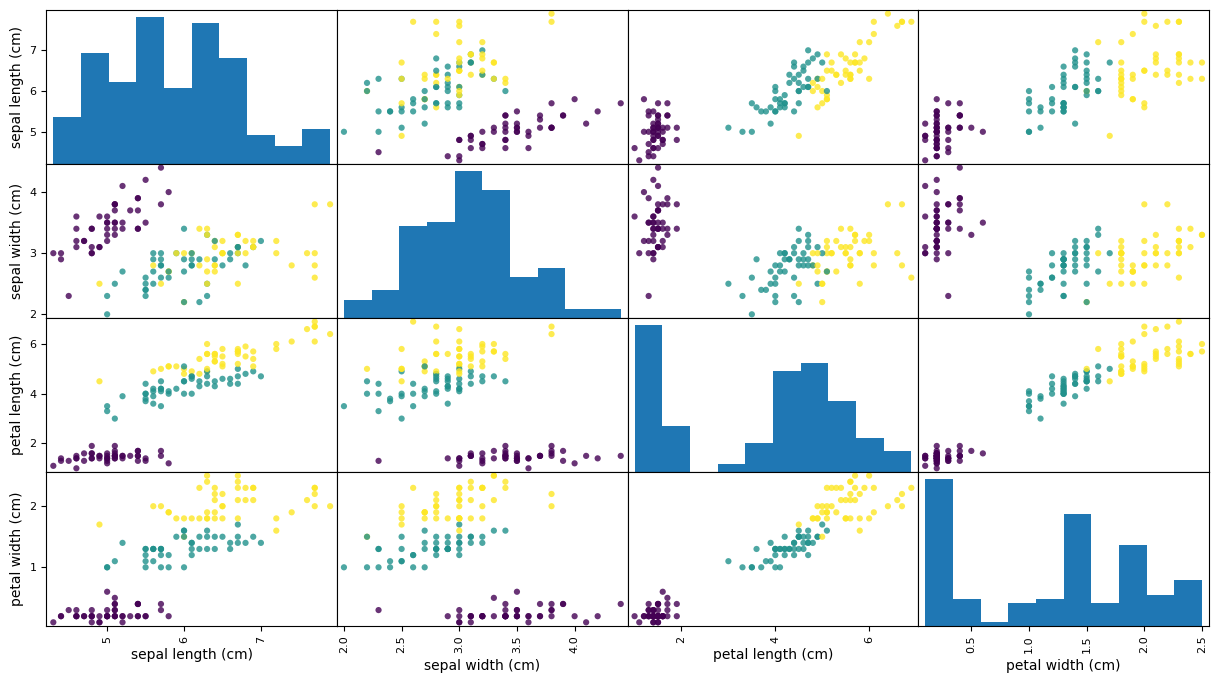

In [66]:
print(plt.get_cmap().name)

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, s=80, figsize=(15, 8), alpha=.8);

### Paso 3: Construcción de un modelo 

Para construir nuestro árbol creamos un objeto de la clase [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) a la que más tarde cambiaremos parámetros.

En este punto definimos que:
  - la profundidad máxima del árbol será 3
  - que el criterio para la selección en cada nodo sera `entropy`
  


In [59]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3, criterion="entropy")

Una vez creado nuestro clasificador, debemos entrenarlo con el método `fit`. 

Es interesante mencionar que en `sklearn` siempre usaremos `fit()` para entrenar pasandole los datos. La configuración vendrá en el constructor.

**Antes** de ejecutar `fit` explorar `arbol.fit?`.

In [60]:
arbol.fit?

Signature: arbol.fit(X, y, sample_weight=None, check_input=True)
Docstring:
Build a decision tree classifier from the training set (X, y).

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The training input samples. Internally, it will be converted to
    ``dtype=np.float32`` and if a sparse matrix is provided
    to a sparse ``csc_matrix``.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    The target values (class labels) as integers or strings.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights. If None, then samples are equally weighted. Splits
    that would create child nodes with net zero or negative weight are
    ignored while searching for a split in each node. Splits are also
    ignored if they would result in any single class carrying a
    negative weight in either child node.

check_input : bool, default=True
    Allow to bypass several input checking.
    Don't use this parameter

In [61]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Paso 4: Predicciones

Si queremos predecir una nueva instancia, por ejemplo:

In [77]:
X_new = np.array([[5, 2.9, 1, 0.2]]) # sepal length: 5 (bajo) , sepal width: 2.9 (bajo/medio) , petal length: 1 (bajo), petal width: 0.2 (bajo)
# mi prediccion : violeta
X_new2 = np.array([[10,5,3,3]])
print(f"X_new.shape: {X_new.shape}")
print(f"X_new2.shape: {X_new2.shape}")


X_new.shape: (1, 4)
X_new2.shape: (1, 4)


Necesitamos contar con nuestro clasificador (previamente entrenado) e invocar a `predict` con la(s) instancia(s) que queremos predecir.

**Antes** de ejecutar `predict` explorar `arbol.predict?`.

In [63]:
arbol.predict?

Signature: arbol.predict(X, check_input=True)
Docstring:
Predict class or regression value for X.

For a classification model, the predicted class for each sample in X is
returned. For a regression model, the predicted value based on X is
returned.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The input samples. Internally, it will be converted to
    ``dtype=np.float32`` and if a sparse matrix is provided
    to a sparse ``csr_matrix``.

check_input : bool, default=True
    Allow to bypass several input checking.
    Don't use this parameter unless you know what you're doing.

Returns
-------
y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    The predicted classes, or the predict values.
File:      /usr/local/lib/python3.10/site-packages/sklearn/tree/_classes.py
Type:      method

In [79]:
prediction = arbol.predict(X_new)
#prediction = arbol.predict(X_new2)

print(f"Predicción: {prediction}")
print(f"Nombre de la clase predicha: {iris_dataset['target_names'][prediction]}")

Predicción: [0]
Nombre de la clase predicha: ['setosa']


### Paso 5: Evaluación del modelo

Ahora ya estamos listos para poder verificar la performance de nuestro árbol con los datos que habíamos separado para _test_ previamente.

In [80]:
# predecimos los valores para las instacias que no vimos
y_pred = arbol.predict(X_test)

print(f"Predicciones:   {y_pred}\nValores reales: {y_test}")
# Podemos calcular el accuracy (exactitud) comparando los valores predichos contra los reales, 
# para ello contamos cuántas coincidencias hubo y dividimos por la cantidad de comparaciones que hicimos:
print(f"Accuracy sobre el test set: {np.mean(y_pred == y_test)}") 

#También podemos invocar al método score que viene con los DecisionTreeClassifier
print(f"Accuracy sobre el test set: {arbol.score(X_test, y_test)}") 

Predicciones:   [1 1 2 0 2 1 0 2 0 1 1 1 2 2 0]
Valores reales: [1 2 2 0 2 1 0 1 0 1 1 2 2 2 0]
Accuracy sobre el test set: 0.8
Accuracy sobre el test set: 0.8


Podemos observar el resultado de nuestra clasificación con las matrices de confusión que tienen:
- cada fila los valores observados o reales
- cada columna los valores predichos

que si integramos esta información nos da:
- $m_{i,i}$ las instancias bien clasificadas
- $m_{i,j}\ (con\ i\neq j)$ las instancias mal clasificadas

Ej. si tenemos la siguiente matriz de confusión:

||setosa|versicolor|virginica|
|-----|-----|-----|-----|
|**setosa**| 6 | 0 | 0 |
|**versicolor**| 0 | 2 | 1 |
|**virginica**| 0 | 0 | 6 | 

Podemos decir que todas las instancias de la clases **setosa** y **virginica** fueron correctamente clasificadas, mientras que para las de **versicolor** 2 fueron correctas, mientras que una fue clasificada con **virginica** fallando en este caso la predicción.

Si sumamos por filas podemos ver que en _test_ tenemos: 
  - 6 de clase **setosa**
  - 3 de clase **versicolor** 
  - 6 de clase **virginica**
  
Y si sumamos por columna podemos ver la cantidad predicha para cada clase:
  - 6 de clase **setosa**
  - 2 de clase **versicolor** 
  - 7 de clase **virginica**
  

In [81]:
print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
display(pd.DataFrame(confusion, columns=iris_dataset['target_names'], index=iris_dataset['target_names']))

Matriz de confusión:


,setosa,versicolor,virginica
setosa,4,0,0
versicolor,0,4,1
virginica,0,2,4


### En resumen

1. separamos nuestro data set original en entrenamiento (_train_) y evaluación (_test_)
1. armamos y entrenamos (`fit`) un árbol de decisión con parámetros:
    - `max_depth=3`
    - `criterion="entropy"`
1. evaluamos el árbol en el conjunto de entrenamiento y de evaluación

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=4, test_size=0.1)

arbol = DecisionTreeClassifier(max_depth=3, criterion="entropy")
arbol.fit(X_train, y_train)

print(f"Score sobre el training set: {arbol.score(X_train, y_train):.2f} ¿qué indica este número?")
print(f"Score sobre el test set: {arbol.score(X_test, y_test):.2f}  ¿qué indica este número?")


### Experimentando con Árboles de Decisión: 

1. Probar distintos valores para: `max_depth` y graficar la performance (_accuracy_) sobre el conjunto de test al variar este parámetro. 
1. ¿Qué ocurre con la _accuracy_ sobre train con respecto al valor sobre test de un mismo clasificador? 
1. ¿Cuál es el máximo valor de profundidad que se alcanza?¿cómo lo obtengo?¿por qué? 
    Para responder estas pregunta se puede acceder a la documentación con el comando `sklearn.tree.DecisionTreeClassifier?`
1. Graficar la importancia de features para el clasificador con mejor _Accuracy_ en el test_set. Explorar el atributo `feature_importances_` de un árbol entrenado, ¿qué atributos fueron los mas relevantes? ¿es el mismo método que el visto en clase?
1. Evaluar la importancia de features utilizando `permutation_importance`, graficar.
    
1. Graficar el árbol obtenido (ver función `dibujar_arbol` provista en la próxima celda). 

    1. ¿qué representa cada nodo?
    1. ¿qué información contiene cada nodo?
    1. ¿qué representa el color?
    1. ¿qué son los ejes?

In [ ]:
# !pip3 install pydotplus
# También instalar Graphviz. (en ubuntu: sudo apt-get install graphviz)

from six import StringIO  #pip3 install six
##### from sklearn.externals.six import StringIO  # opción para versiones más viejas de sklearn
from IPython.display import Image, display
import pydotplus

    
def dibujar_arbol(clf, c_name=iris_dataset.target_names, f_name=iris_dataset.feature_names):
    #
    # modo de uso: dibujar_arbol(arbol)
    #
    dot_data = StringIO()
    sklearn.tree.export_graphviz(clf, out_file = dot_data,  
                    filled = True, 
                    class_names = c_name,
                    feature_names = f_name,
                    special_characters = True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

### Sobre fronteras de decisión

A continuación exploraremos dentro del dataset iris el funcionamiento de las fronteras de decisión.
Para hacerlo nos quedaremos sólo con 2 dimensiones del dataset: `sepal length (cm)`, `sepal width (cm)`.

En la próxima celda tenemos la función `explore_decision_tree_boundaries` que si es llamada sin parámetros corre un árbol de clasificación con los parámetros por defecto del mismo y genera una representación de como el plano conformado por las 2 dimensiones propuesta se dividen en las clases que predecirán y árbol que generó dichas fronteras.

Explorar diversos valores permitidos de profundidad máxima permitido del árbol del clasificador y analizar las visualizaciones generadas en términos de: 
  - sobreajuste
  - subajuste

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

def explore_decision_tree_boundaries(max_depth=None, criterion="entropy", data_set=iris_dataset, cols=[0, 1]):
    n_classes, plot_colors, plot_step = 3, "ryb", 0.02
    fig=plt.figure(figsize=(10,7), dpi= 100, facecolor='w', edgecolor='k')
    
    X = data_set["data"][:, cols]
    y = data_set["target"]

    # Build and train Classifier
    tree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(1, 1, 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        tree,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=data_set.feature_names[cols[0]],
        ylabel=data_set.feature_names[cols[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=data_set.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

    plt.suptitle(f"Fronteras de decisión de un árbol de altura {tree.get_depth()} y #hojas: {tree.get_n_leaves()}")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    _ = plt.axis("tight")
    plt.show()
    
    dibujar_arbol(tree, f_name=[data_set.feature_names[cols[0]],data_set.feature_names[cols[1]]]
                 )
    


Ejecutar la función y luego explorar como cambia el comportamiento al modificar los parámetros por defecto:
  - `max_depth`
  - `criterion`

In [ ]:
explore_decision_tree_boundaries()
